In [51]:
%matplotlib inline

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.svm import SVC

plt.rcParams["figure.figsize"] = (10, 10)
sns.set_theme()

In [53]:
# 40 классов (человек)
# 400 картинок 64x64
faces = datasets.fetch_olivetti_faces(data_home='data')
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

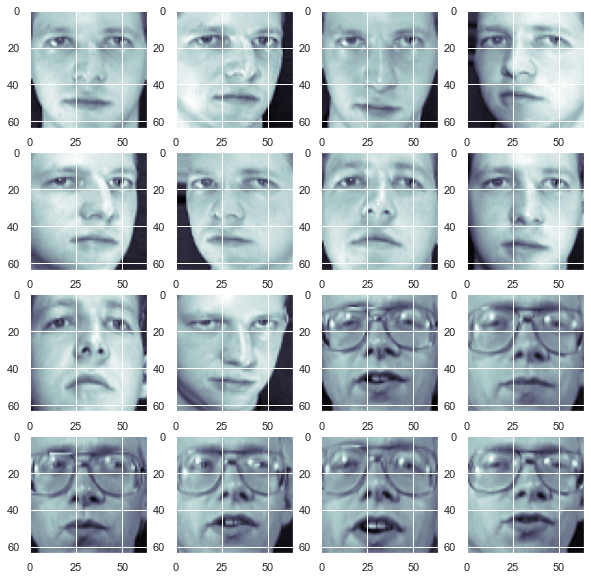

In [54]:
n = 4
fig, axs = plt.subplots(n, n)
for i in range(n):
    for j in range(n):
        axs[i][j].imshow(faces['images'][i * n + j], cmap=plt.cm.bone)

In [55]:
X, y = faces['data'], faces['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=True)

In [56]:
# метод Опорных векторов
model = SVC()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

In [57]:
print(metrics.classification_report(y_test, y_test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         3
           3       0.00      1.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         4
           7       1.00      0.50      0.67         2
           8       0.67      0.80      0.73         5
           9       1.00      0.50      0.67         6
          10       1.00      1.00      1.00         3
          11       0.67      1.00      0.80         2
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       0.50      1.00      0.67         1
          16       1.00      1.00      1.00         2
          17       1.00    

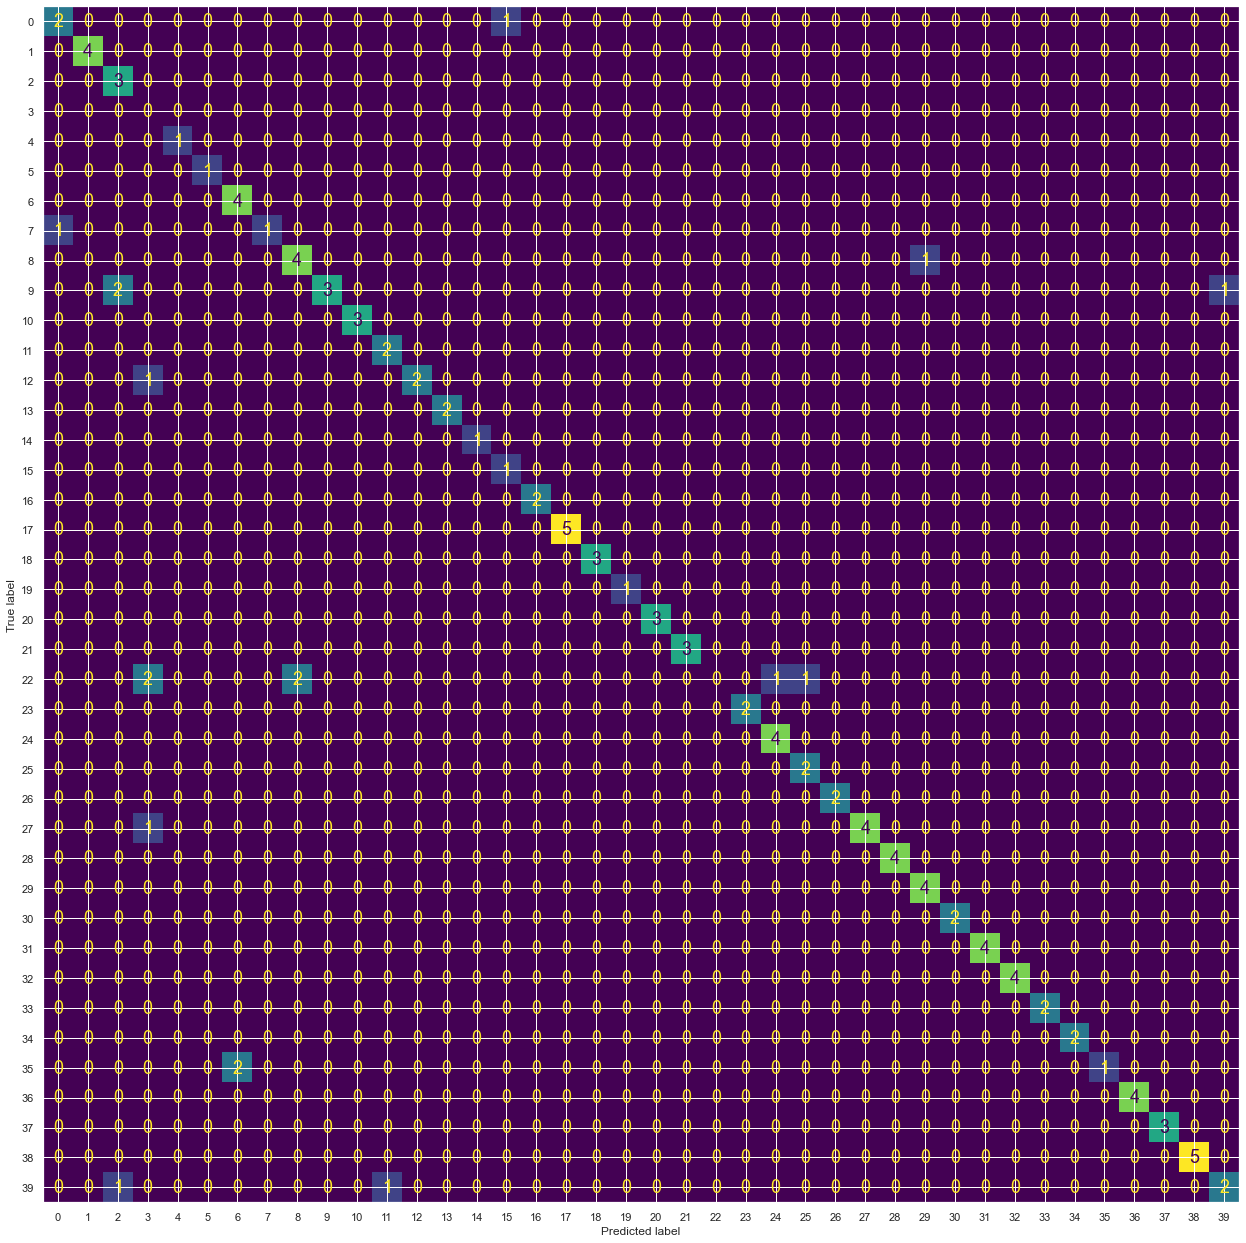

In [58]:
_, ax = plt.subplots(figsize=(22, 22))
matrix = metrics.confusion_matrix(y_test, y_test_pred)
matrix_display = metrics.ConfusionMatrixDisplay(matrix).plot(ax=ax, colorbar=False)
np.vectorize(lambda x: x.set_fontsize(18))(matrix_display.text_)
_ = matrix_display

In [59]:
# реализация функции взята с https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(
        estimator,
        title,
        X,
        y,
        axes=None,
        ylim=None,
        cv=None,
        n_jobs=None,
        train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


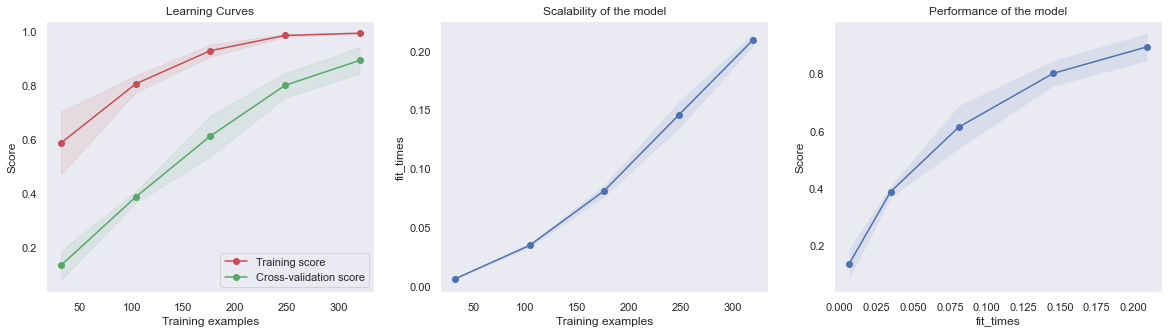

In [60]:
# кривые обучения
_ = plot_learning_curve(model, 'Learning Curves', X, y, cv=ShuffleSplit(n_splits=5, test_size=0.2))